# Hypothesis Tests
## Name: Brshank Singh Negi
## Roll No: I032
## B.Tech AI
# **EXPT 10**

AIM:
1. Outlier Detection using Z-score / Z-test
2. Use T-test for testing/comparing the means of two samples if they belong to the same population

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import random
import seaborn as sns
# warnings.filterwarnings('ignore')

In [2]:
mu,sigma=30,5
s=np.random.normal(mu,sigma,100)
print(s)


[19.52216053 18.74071132 34.96977479 23.70048121 31.02808081 12.00708751
 30.16961486 29.27983701 25.48916092 31.7694782  31.51253109 39.37796844
 42.1234913  24.86041247 33.65400688 27.87917337 27.68638801 28.9125908
 37.63944667 30.28557326 30.86303999 23.11970604 24.99651992 25.08633677
 33.14506516 27.58377307 25.81209775 31.91004162 23.15049581 26.35131056
 26.97212157 27.90329534 24.46560318 30.34474328 23.99524498 29.38753861
 37.23004576 29.3148425  34.20551678 36.36729533 34.16748318 34.92354119
 29.33178189 26.50218257 25.16846381 35.12784788 32.63580827 28.03894963
 30.84191426 25.50480848 27.46874669 28.92602505 31.14297253 37.32870644
 40.33422357 27.28865895 36.88109857 25.40703373 28.85694455 27.39144048
 36.96095888 27.74317307 33.45018523 36.56678281 32.14852591 34.67970161
 32.92696005 31.21811427 30.14381982 23.77847153 34.18863484 28.96593302
 39.43223059 34.7554007  42.79192931 26.48503621 29.47255834 23.32491532
 28.49896913 29.10299542 28.6871461  31.24647201 19.

(array([ 1.,  0.,  6.,  7., 17., 27., 16., 15.,  7.,  4.]),
 array([12.00708751, 15.09278408, 18.17848064, 21.26417721, 24.34987377,
        27.43557034, 30.5212669 , 33.60696346, 36.69266003, 39.77835659,
        42.86405316]),
 <BarContainer object of 10 artists>)

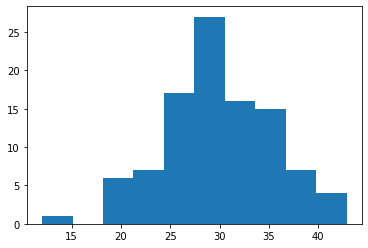

In [3]:
plt.hist(s)

In [4]:
s[85]=120
s[15]=10

In [5]:
np.max(s)

120.0

In [6]:
np.min(s)

10.0

In [7]:
df=pd.DataFrame(s,columns=['Data'])

In [8]:
df

,Data
0,19.522161
1,18.740711
2,34.969775
3,23.700481
4,31.028081
...,...
95,29.326514
96,35.679360
97,35.177932
98,19.820972


In [9]:
for col in df.columns:
    col_zscore=col+'_zscore'
    df[col_zscore]=(df[col]-df[col].mean())/df[col].std(ddof=0)

In [10]:
df['Data_zscore']=(df['Data']-df['Data'].mean())/df[col].std(ddof=0)

In [11]:
df['outlier']=(abs(df['Data_zscore']) >1.95 ).astype(int)

In [12]:
df.loc[df.outlier==1]

,Data,Data_zscore,outlier
85,120.0,8.316943,1


In [13]:
x=int(input('Enter weight of 10 yr old='))

In [14]:
meann=df['Data'].mean()
meann

30.490983691708237

In [15]:
stdd=df[col].std(ddof=0)
stdd

10.762250174905482

In [16]:
abs((x-meann)/stdd)

1.7181336050730331

In [17]:
if (abs((x-meann)/stdd) >1.95):
    print('this is an Outlier for X=',x,)
else:
    print('Reject H0:',x,' is not an Outlier')

Reject H0: 12  is not an Outlier


# 3 Use T-test for testing comparing the meansa of two samples if t they belong to the same population


## H0= Same Distro
## H1= Different Distro


In [18]:
np.random.seed(8)

In [19]:
s1_sales=np.random.randint(1500,3000,100)
s1_sales

array([1951, 2864, 1861, 1633, 2486, 1636, 2351, 2884, 1548, 2609, 2328,
       1615, 1958, 2167, 2120, 1769, 2585, 1643, 2873, 2878, 2839, 1770,
       2626, 1849, 1940, 2277, 2063, 2464, 2449, 2327, 1670, 1910, 1822,
       2533, 2905, 1994, 2605, 1847, 1991, 2075, 2098, 2555, 2544, 2185,
       2033, 2212, 2488, 1528, 2235, 2059, 2918, 2441, 2526, 1922, 1699,
       2647, 2900, 2741, 2464, 2817, 2887, 1950, 2990, 2834, 1923, 2134,
       2570, 1851, 2684, 2341, 2494, 1507, 2906, 2917, 2242, 1926, 1519,
       2327, 1804, 2028, 1612, 1706, 1618, 2261, 2451, 2256, 1605, 2288,
       2772, 1598, 2739, 2750, 1506, 2267, 2936, 2334, 2159, 1983, 2599,
       2791])

In [20]:
s2_sales=np.random.randint(500,1500,50)
s2_sales

array([ 674,  720,  956, 1451,  973, 1410, 1179, 1411,  647, 1070, 1372,
       1380,  881,  875,  880, 1055, 1027,  528, 1111, 1428,  669,  644,
       1086,  661,  993, 1462,  954, 1202, 1019, 1351, 1276,  918, 1309,
       1441,  650, 1216,  976,  841, 1061,  919, 1169, 1297, 1248,  692,
       1060, 1200,  684, 1466,  923,  780])

/home/brshank/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/brshank/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'sales prices  '),
 Text(0, 0.5, 'probability value'),
 Text(0.5, 1.0, 'prob. distribution')]

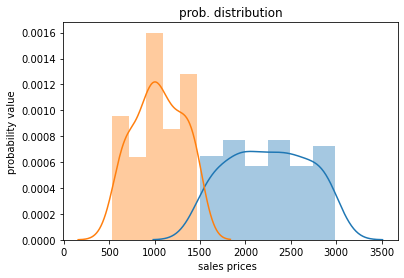

In [21]:
ax=sns.distplot(s1_sales)
ax.set(xlabel='sales prices ',ylabel='probability value',title='prob. distribution')
ax=sns.distplot(s2_sales)
ax.set(xlabel='sales prices  ',ylabel='probability value',title='prob. distribution')

In [22]:
from scipy.stats import ttest_ind
#alpha = 1- confidence 
def compare_2_Sales(arr1,arr2,alpha,sample_size):
    stats,p = ttest_ind(arr1,arr2)
    if p>alpha:
        print('H0:Accept for ', 100*(1-alpha),'"%" confidence == Same Distribution')
    else:
        print('H1: Reject for ', 100*(1-alpha),'"%" confidence == Different Distribution')

In [23]:
sample_size=15
s1_sample=np.random.choice(s1_sales,sample_size)
s2_sample=np.random.choice(s2_sales,sample_size)

In [24]:
perc_confidence=int(input('Enter Confidence %='))
alpha=1-(perc_confidence/100)
compare_2_Sales(s1_sample,s2_sample,alpha,sample_size)


H1: Reject for  95.0 "%" confidence == Different Distribution


## Conclusion=
### WE STUDIED ABOUT THE ZTESTS AND HYPOTHESIS TESTING 
## Took some Real Life examples and implemented the z test 